In [73]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [74]:
import os
import scipy
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta


In [75]:
import sqlalchemy
from sqlalchemy import func
from sqlalchemy.orm import declarative_base
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


# Reflect Tables into SQLAlchemy ORM

In [76]:
# create engine to hawaii.sqlite
# engine = create_engine('sqlite:////Users/lynn/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite')
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [77]:
# get the current working directory
cwd = os.getcwd()

# join the current working directory with the database filename
db_file = os.path.join(cwd,'hawaii.sqlite')

# check if the file exists
if os.path.exists(db_file):
    print(f"The file {db_file} exists.")
else:
    print(f"The file {db_file} does not exist.")


The file /Users/lynn/Desktop/sqlalchemy-challenge/hawaii.sqlite exists.


In [78]:
# file_path = "/Users/lynn/Desktop/sqlalchemy-challenge/Resources/hawaii.sqlite"

file_path = "Resources/hawaii.sqlite"

if os.path.isfile(file_path):
    print("File exists")
else:
    print("File does not exist")


File exists


In [79]:
print(os.getcwd())


/Users/lynn/Desktop/sqlalchemy-challenge


In [80]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

In [81]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [82]:
# Save references to each table
# Assign the measurement class to a variable called `Measurement`
Measurement = Base.classes.measurement

# Assign the Station class to a variable called `Station`
Station = Base.classes.station

In [83]:
# Create our session (link) from Python to the DB
# Create a session
session = Session(engine)



# Exploratory Precipitation Analysis

In [84]:

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# get the names of tables in the database
table_names = inspector.get_table_names()
print(table_names)

['measurement', 'station']


In [85]:
#inspect measurement table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [86]:
#inspect station table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [87]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent_date[0])


2017-08-23


In [88]:
# Calculate the date 1 year ago from the most recent date in the database
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

# Starting from the most recent data point in the database. 
most_recent_date_obj = datetime.strptime(most_recent_date, '%Y-%m-%d').date()

# Calculate the date one year from the last date in data set.
one_year_ago_date = most_recent_date_obj - timedelta(days=365)


In [89]:
# Perform a query to retrieve the data and precipitation scores
results= session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= one_year_ago_date).all()
results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [90]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','prcp'])
df.set_index('date', inplace=True)
df

prcp
date            
2016-08-23  0.00
2016-08-24  0.08
2016-08-25  0.08
2016-08-26  0.00
2016-08-27  0.00
...          ...
2017-08-19  0.09
2017-08-20   NaN
2017-08-21  0.56
2017-08-22  0.50
2017-08-23  0.45

[2230 rows x 1 columns]

In [91]:
# Sort the dataframe by date
df.sort_index(inplace=True)


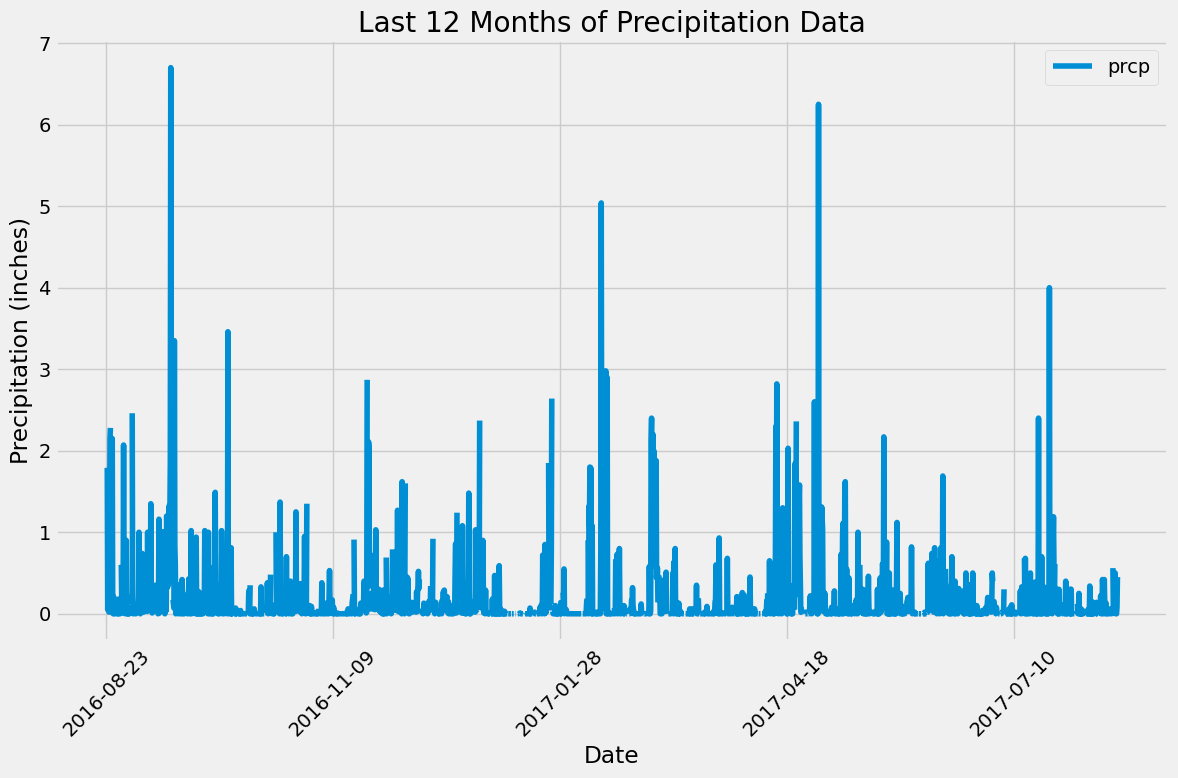

In [92]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the precipitation data
df.plot(figsize=(12,8))
plt.title('Last 12 Months of Precipitation Data')
plt.xlabel('Date')
plt.ylabel('Precipitation (inches)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_stats = df.describe()
summary_stats

prcp
count  2021.000000
mean      0.177279
std       0.461190
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000

# Exploratory Station Analysis

In [94]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Station).count()
total_stations


9

In [95]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()

print(most_active)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [96]:
# Using the most active station id from the previous query
most_active_station = 'USC00519281'

# Calculate the lowest, highest, and average temperature for the most active station
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()


[(54.0, 85.0, 71.66378066378067)]

In [97]:


# Find the earliest and latest dates for temperature observations for the most active station
earliest_date = session.query(func.min(Measurement.date)).filter(Measurement.station == most_active_station).first()[0]
latest_date = session.query(func.max(Measurement.date)).filter(Measurement.station == most_active_station).first()[0]

print(f"Earliest date: {earliest_date}")
print(f"Latest date: {latest_date}")


Earliest date: 2010-01-01
Latest date: 2017-08-18


In [98]:
# Query the last 12 months of temperature observation data for the most active station
last_twelve_months = session.query(Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= (datetime.strptime('2016-08-18', '%Y-%m-%d') - timedelta(days=365))).\
    filter(Measurement.date <= datetime.strptime('2016-08-18', '%Y-%m-%d')).all()

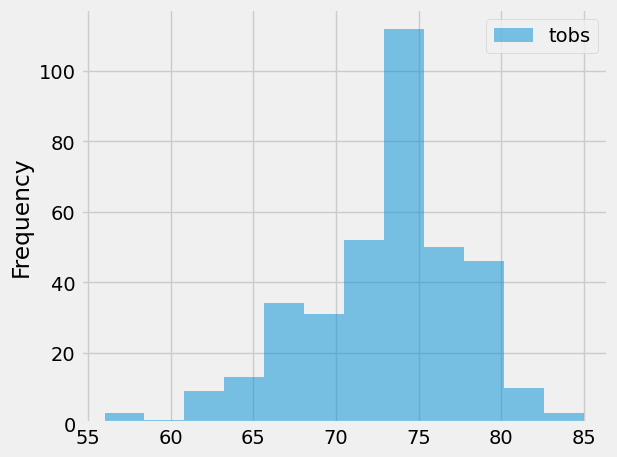

In [99]:

# Convert the results to a Pandas DataFrame and plot as a histogram
df = pd.DataFrame(last_twelve_months, columns=['tobs'])
df.plot.hist(bins=12, alpha=0.5)
plt.tight_layout()
plt.show()

# Close session

In [64]:
# Close Session
session.close()